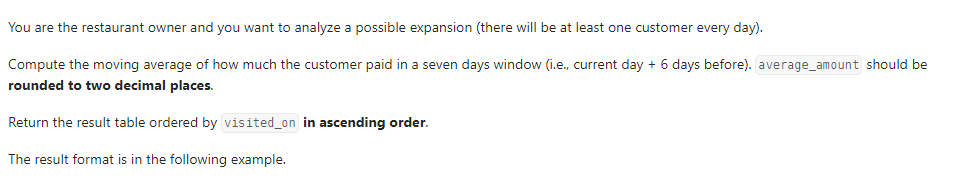

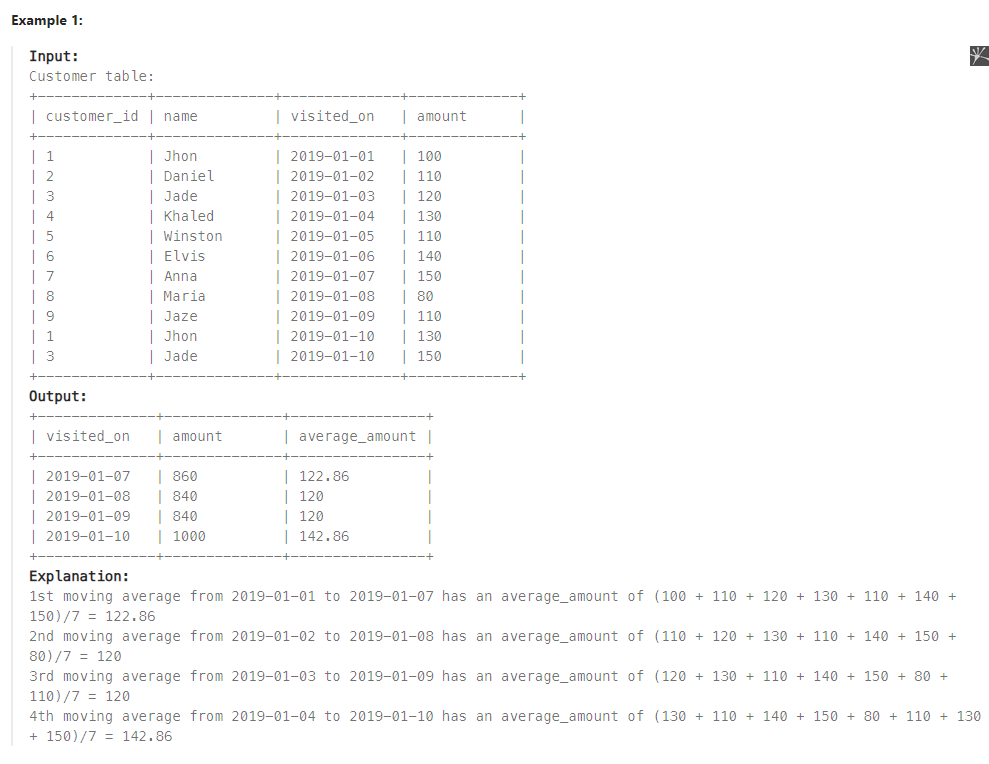

    # Write your MySQL query statement below
    with cte as
    (
        select visited_on,sum(amount) as total_amount from Customer
        group by visited_on
    ),
    cte2 as
    (
        select visited_on,sum(total_amount) over(order by visited_on Rows between
        6 preceding and current row) as amount,
        round(avg(total_amount) over(order by visited_on Rows between
        6 preceding and current row),2) as average_amount
        from cte
    )

    select * from cte2
    where visited_on >= (select visited_on from cte2  order by visited_on limit 1)+6